In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1")[['v1', 'v2']]
df.columns = ['label', 'message']
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # ham=0, spam=1

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

In [6]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [8]:
y_pred = model.predict(X_test_tfidf)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 0.9695067264573991

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


 Confusion Matrix:
 [[966   0]
 [ 34 115]]


In [9]:
test_df = pd.DataFrame({
    'message': X_test,
    'actual': y_test,
    'predicted': y_pred
})
print("\n----- 3 Predicted SPAM Messages -----\n")
print(test_df[test_df['predicted'] == 1].head(3)['message'].to_string(index=False))
print("\n----- 3 Predicted HAM Messages -----\n")
print(test_df[test_df['predicted'] == 0].head(3)['message'].to_string(index=False))




----- 3 Predicted SPAM Messages -----

You have won ?1,000 cash or a ?2,000 prize! To ...
You are now unsubscribed all services. Get tons...
Wanna get laid 2nite? Want real Dogging locatio...

----- 3 Predicted HAM Messages -----

Oh right, ok. I'll make sure that i do loads of...
                    I am in tirupur.  call you da.
            No that just means you have a fat head


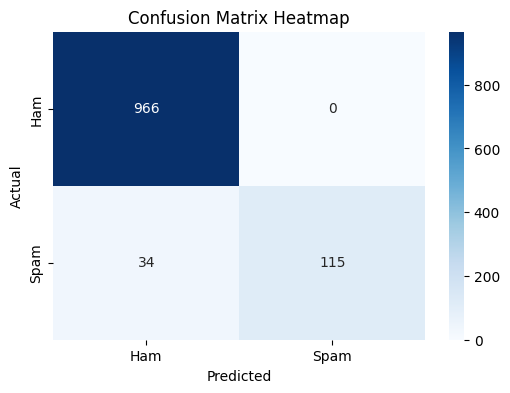

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
